# Explore public transportation in USA

## Data source list:

* Data of public transportation from National Transit Database
* Maps of urbanized area from Census Bureau of United States

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# NTD data of service
ntd_service_xls = "../data/ntd/2012/2012_Service.xls"
ntd_service_df = pd.read_excel(ntd_service_xls)

In [41]:
select_flag = np.logical_and.reduce((ntd_service_df.loc[:, 'Time_Period_Desc']=='Annual Total', \
                                     ~np.isnan(ntd_service_df.loc[:, 'Veh_Miles_Num']), \
                                     ~np.isnan(ntd_service_df.loc[:, 'Passenger_Miles_Num'])))

ntd_service_df = ntd_service_df.loc[select_flag, :]
grouped_ntd_service = ntd_service_df.loc[:, ['Trs_Id', \
                                             'Mode_Cd', \
                                             'Veh_Miles_Num', \
                                             'Passenger_Miles_Num']].groupby(['Trs_Id', 'Mode_Cd'])

In [42]:
grouped_ntd_service_agg = grouped_ntd_service.aggregate(np.sum)

In [45]:
idx = grouped_ntd_service_agg.index.names.index('Mode_Cd')
grouped_ntd_service_agg = grouped_ntd_service_agg.reset_index('Mode_Cd')

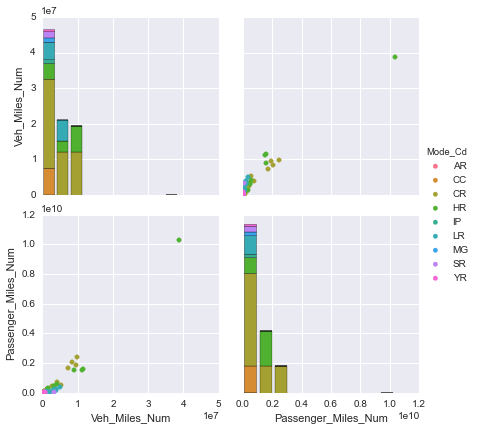

In [89]:
# Plot vehicle revenue miles against passenger miles for different transit modes
g = sns.PairGrid(grouped_ntd_service_agg, hue='Mode_Cd')
g.map_diag(plt.hist, bins=10, log=True)
g.map_offdiag(plt.scatter)
for ga in g.axes.flatten().tolist():
    ga.set_xlim((0, ga.get_xlim()[1]))
    ga.set_ylim((0, ga.get_ylim()[1]))
g.add_legend()